# Disease Prediction

## 2.0- EDA warmup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
disease = "../data/cardio_train.csv"

df_disease = pd.read_csv(disease, sep=";") # using sep to separate the columns

In [4]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df_disease.info() # The data set has no nan values. However with further research about the subject we may find outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


For good practice and ease of reading for the user, I will swap the variables in columns that are represented by numbers 

## a)

In [6]:
# To answer this question I need to look at the cardio column. 0 is represented as NO and 1 is represented as yes
neg_cardio = (df_disease["cardio"].value_counts()[0])
pos_cardio = (df_disease["cardio"].value_counts()[1])

print(f"The amount of people in the data frame who have a positive cardiovascular disease  is {neg_cardio}")
print(f"The amount of people in this data frame who have a negative cardiovascular disease is {pos_cardio}")
print(f"This is out of {neg_cardio + pos_cardio} people")

The amount of people in the data frame who have a positive cardiovascular disease  is 35021
The amount of people in this data frame who have a negative cardiovascular disease is 34979
This is out of 70000 people


## b)

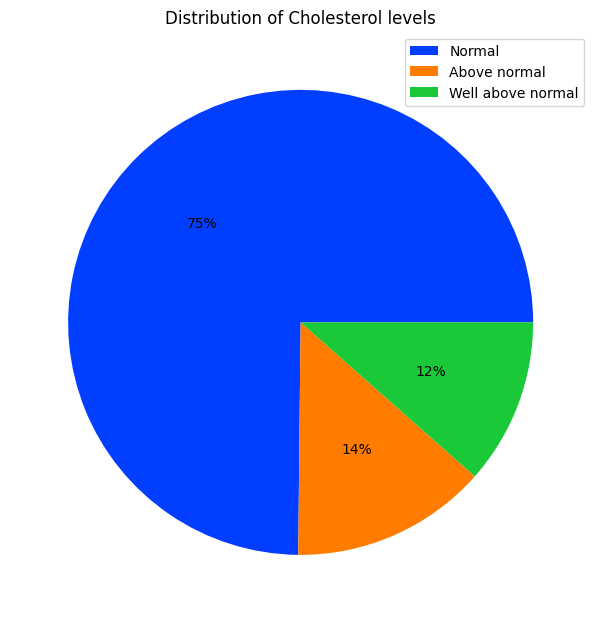

In [7]:
# To answer this question about cholesterol number 1 represents "normal", number 2 "above normal" and number 3 "well above normal"

norm_chol = (df_disease["cholesterol"].value_counts()[1]) # creating variables that have the amounts of each stage of cholesterol
above_chol = (df_disease["cholesterol"].value_counts()[2])
well_above_chol = (df_disease["cholesterol"].value_counts()[3])

# crating the size of the charts area
fig,ax = plt.subplots(1,1, figsize =(7.5,9))

# creating lists with the data and labels
data = [norm_chol, above_chol, well_above_chol]  
keys = ["Normal", "Above normal", "Well above normal"] 

# giving the pie chart a bright color palette
palette_color = sns.color_palette("bright")

# plotting the data on the chart, autopct gives percentage to 0 decimal
plt.pie(data,colors=palette_color, autopct="%.0f%%")

# adding a legend to the plot
plt.legend(keys, loc="best")

# plotting a title
plt.title("Distribution of Cholesterol levels")

# display the chart
plt.show()


## c)

In [8]:
# This question is to visualize the age column, as it is in days I need to convert it to years for better reading.
# I can do this by dividing the age column by 365.2425
df_disease["age"] = round(df_disease["age"]/365.2425,2)
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df_disease["age"].describe()

count    70000.000000
mean        53.303938
std          6.755099
min         29.560000
25%         48.360000
50%         53.940000
75%         58.390000
max         64.920000
Name: age, dtype: float64

Text(0.5, 1.0, 'Chart of age distribution in the data frame')

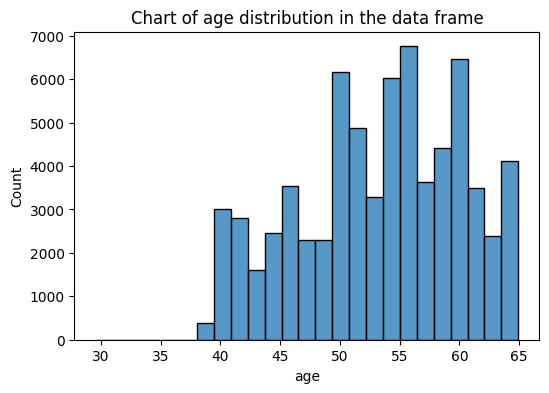

In [10]:
fig,ax = plt.subplots(1,1, figsize =(6,4))

sns.histplot(data=df_disease, x="age", bins=25 )
# TODO maybe show a graph showing the and ranges from 30 to late 30's

# add a title
plt.title("Chart of age distribution in the data frame")

As you can see the majority of ages are from the late 30's up until the age of 65. This shows that the data frame has no data from patients over 65. From a describe of the data frame it shows that the age range is from 30 to 65. However the data from 30 to the mid 30's is under 1000 patients 

## d)

The amount of smokers is 6169 and the amount of non smokers is 63831


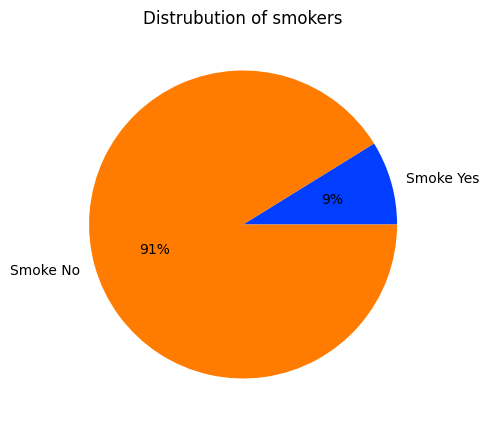

In [11]:
# the value of 0 represents "No" the value of 1 represents "Yes"
smoke_yes = (df_disease["smoke"].value_counts()[1]) # creating variables that have the amounts of each stage of smoke
smoke_no = (df_disease["smoke"].value_counts()[0])
print(f"The amount of smokers is {smoke_yes} and the amount of non smokers is {smoke_no}")

# creating data to beused in the plot and the labels
data = [smoke_yes, smoke_no]
labels = ["Smoke Yes", "Smoke No"]

#setting the figsize
fig, ax = plt.subplots(1,1 ,figsize=(5,5))
plt.title("Distrubution of smokers")

plt.pie(data,colors=palette_color, labels=labels, autopct="%.0f%%")
plt.show();

## e)

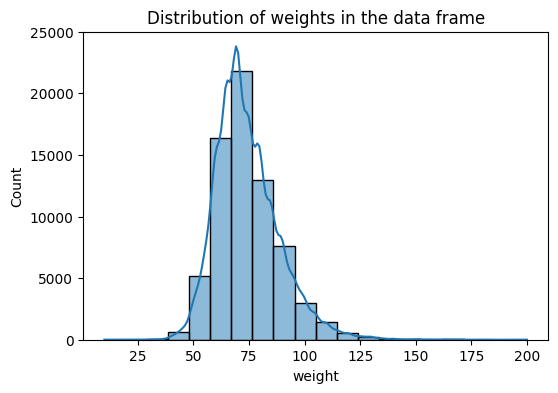

In [12]:
fig,ax = plt.subplots(1,1, figsize=(6,4))

sns.histplot(data=df_disease, x="weight", bins=20, kde=True )

plt.title("Distribution of weights in the data frame")

plt.show();

## f)

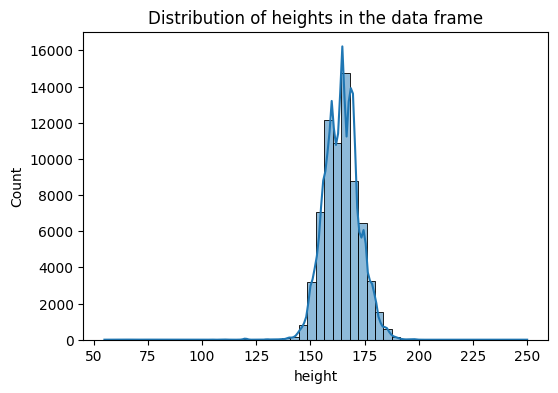

In [13]:
fig,ax = plt.subplots(1,1, figsize=(6,4))

sns.histplot(data=df_disease, x="height", bins=50, kde=True )

plt.title("Distribution of heights in the data frame")

plt.show();

# 2.1.0 Feature engineering BMI

In [14]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
# creating a column for BMI using the formula weight / height * height
df_disease["BMI"] = round(df_disease["weight"]/((df_disease["height"]/100)**2),2)
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [24]:
# Checking the BMI fro outliers, The min is at 3.4 and the max is at 298. This is impossible. SO i will have to come up with a good relative range
df_disease["BMI"].describe()

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: BMI, dtype: float64

If I am to get a reasonable estimation of the lowest and highest possible BMI I will need to seperate the data frame into male and females. This is because Different genders cope differently with BMI. SO I will separate the data frame into two data frames according to gender. I will then clean the data then rejoin the two data frames.

## a)

In [37]:
df_male = df_disease[df_disease.gender == 2]
df_male.head(3)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0,21.97
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1,28.71
7,12,61.83,2,178,95.0,130,90,3,3,0,0,1,1,29.98


In [38]:
df_female = df_disease[df_disease.gender == 1]
df_female.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1,23.51
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0,23.01
